# Core ML/Posenetで「人体の姿勢を推定」する

In [1]:
from coreml.image_recognition import *
from uikit.ui_uiimage_convert import *
from PIL import Image
import numpy as np

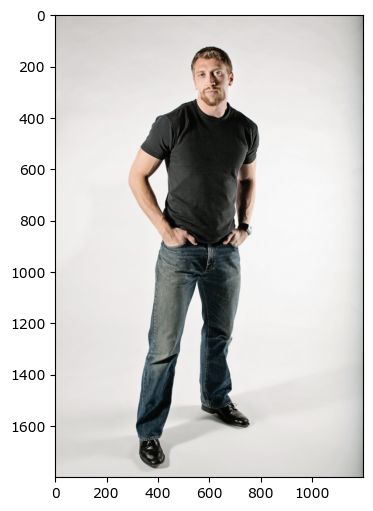

In [2]:
from matplotlib import pylab as plt

#img = photos.capture_image()
pil_img = Image.open(
    "brett_lark_cancer_cure_pose_healing_healthy_male.jpg")

plt.figure(figsize=[6,6])
plt.imshow(np.array(pil_img), aspect=1.0)

In [3]:
if pil_img:
    scale_image(pil_img, 224)
    vn_model = load_model(
        'https://ml-assets.apple.com/coreml/models/Image/PoseEstimation/PoseNet/PoseNetMobileNet100S8FP16.mlmodel',
        'PoseNetMobileNet100S8FP16.mlmodel',
        os.getcwd()+'/models/')
    result =  performRequests_image(vn_model, pil_img)
    if not result:
        print('処理できませんでした')
print( result[1] )

<VNCoreMLFeatureValueObservation: 0x2835aef40> 23C2E412-107C-41E6-B83C-66E6AA89DE41 VNCoreMLRequestRevision1 confidence=1.000000 "heatmap" - "MultiArray : Double 17 × 65 × 65 array" (1.000000)


[17, 65, 65]


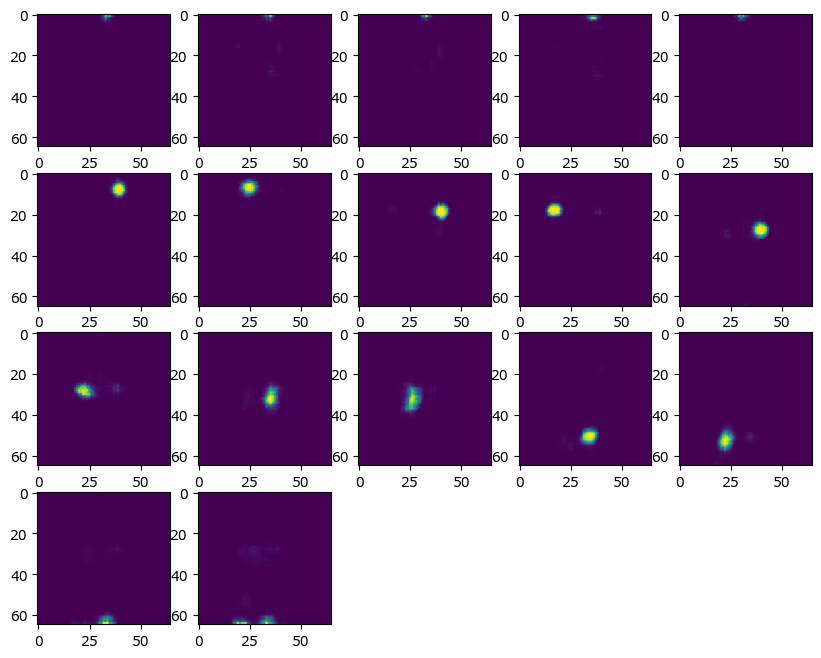

In [4]:
multi_array = result[1].featureValue().multiArrayValue()
[key, height, width] = [i.integerValue() for i in multi_array.shape()]

positions = []

print([key, height, width])
plt.figure(figsize=(10,10))
for k in range(key):
    heat_map = np.empty([height,width])
    for h in range(height):
        for w in range(width):
            index = 0
            index = index + k * multi_array.strides()[0].integerValue()
            index = index + h * multi_array.strides()[1].integerValue()
            index = index + w * multi_array.strides()[2].integerValue()
            heat_map[h,w] = multi_array.objectAtIndexedSubscript_(index).doubleValue()
    positions.append(np.unravel_index(np.argmax(heat_map),
                                      heat_map.shape) )
    plt.subplot(5,5,k+1)
    plt.imshow(heat_map)

<Figure size 600x600 with 0 Axes>

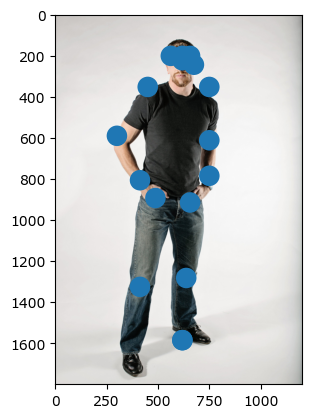

In [5]:
plt.figure(figsize=[6,6])

fig, ax = plt.subplots(1)
ax.imshow(np.array(pil_img), aspect=1.0)

[h,w,_] = np.array(pil_img).shape

from matplotlib.patches import Circle
for pos in positions:
    ax.add_patch(
        Circle( (pos[1]*w/64, pos[0]*h/64/1.3+200), 50) )